<h1> <center>Bitcoin Analysis: Predicting price of Bitcoin through given dataset </center> </h1>
<h3> <center> Project Proposal</center> </h3>


<h2> 1. Introduction </h2>

<h3> 1.1 What is Bitcoin? </h3>
<p> Bitcoin is one of the most popular cryptocurrencies in the world. It was created by Satoshi Nakamoto as a way for people to transfer money over the internet through a peer-to-peer network. Bitcoin was intended to provide an alternative payment method that would set free from third-parties and central control and also to prevent the double spending problem. </p>

<h3> 1.2 How does Bitcoin work? </h3>
<p> Bitcoin works on a technology named blockchain. A blockchain works like a public ledger which stores all the bitcoin transactions around the world. Data within the blockchain are secured by encryption methods. When a new transaction takes place, information from the previous block is copied and brought over to the new block, encrypted, and the transaction is then validated by validators-called miners-in the network. Bitcoin can now be bought using a cryptocurrency exchange where people would be able to buy portions of it in fiat currency like U.S. dollars. Due to the blockchain technology and its'decentralized network, many people are looking to invest in it. </p>

<h3> 1.3 Market Analysis </h3>
<p> Although the cryptocurrency market is known for it's volatility, being dyncamic and also cryptocurrency prediction is extremely challenging due to many factors such as politics, global economic conditions and other unexpected events. However, all of this has led to many data created. With this, I would like to make use of datasets to try and find some market patterns so as to predict the trend of Bitcoin. </p>

<h3> 1.4 Choice of Project </h3>
<p> Throughout the years, Bitcoin price have been fluctuating due to it's supply and demand. According to Coin Metrics, Bitcoin has plunged as much as 30% to about $30,000 in less than 24 hours during this year. As an investor of the Bitcoin market as well, having learnt this module and given the opportunity, I would like to impart some of the knowledge that I have learnt from here to do some data analysis to forecast the price movement of Bitcoin by analysing its price action and volume. </p>

<h2> 2. Aims and Objectives </h2>
<p> Within this project, I would like to: </p>
<ul>
    <li> Find out how accurate technical analysis can predict the price of Bitcoin </li>
    <li> Gather some trend analysis insights by doing some dataset analysis on the Bitcoin market </li>
    <li> Identify the future trend and price of the Bitcoin market </li>

<h2> 3. Data </h2>
<h3> 3.1 Dataset </h3>
<p> I will be using a dataset that I found from Yahoo Finance which has the Bitcoin cryptocurrency market prices from 17 September 2014 to 19 June 2022. The dataset prices are all in BTC-USD currency, which makes it easier for readability as majority of investors uses this currency to analyse the cryptocurrency market. In the dataset, the columns consist of: <p>
    <ul>
        <li> Date - the date of the Bitcoin market </li>
        <li> Open - the opening price of the Bitcoin market on the day </li>
        <li> High - the highest price of Bitcoin during that day </li>
        <li> Low - the lowest price of Bitcoin during that day </li>
        <li> Close - the raw price, which is the cash value of the last transacted price before the Bitcoin market closes </li>
        <li> Adj Close - it is the adjusted closing price, it amends a stock's closing price to reflect Bitcoin's value after accounting for any actions </li>
        <li> Volume - the number of shares traded in Bitcoin over the day </li>
    </ul>

<h3> 3.2 Choice of dataset </h3>
<p> The reason why I have chosen to use this dataset was because majority of the metrics needed for technical analysis on the Bitcoin market is given. Besides that, as Yahoo Finance is one of the notable financial website for investors, making the dataset I have used to be a credible one. Moreover, the dataset is stored in a CSV format, which makes it easier for me to work on. </p>

<h3> 3.3 Limitations of the dataset </h3>
<p> <strong> 24/7 Crytocurrency Market Exchanges </strong> </p>

<h3> 3.4 Libraries Used</h3>
<p> In this project, as I will be doing data analysis on the Bitcoin market, I will be using the library Seaborn, mplFinance and Matplotlib to plot graphs for better visual understanding. I will also be using pandas library to store my dataset as a dataframe. 

In [92]:
# Importing Libraries
import numpy as np
import pandas as pd

import plotly.graph_objects as go
import mplfinance as mpf
import seaborn
import matplotlib.pyplot as plt
import matplotlib as mpl

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from scipy import stats
from datetime import datetime
from itertools import product
import warnings
warnings.filterwarnings('ignore')


<h2> 4. Data Formatting and Graphs </h2>

<h3> 4.1 Storing Data and plotting graph </h3>
<p> In this section, I will first store the CSV data into a dataframe using the pandas library with the date as the index column and also to convert the date column into a DateTimeIndex object. After that, I will be using mplfinance library to plot a graph on Bitcoin market with the price against time.

In [60]:
# Storing and loading of Data
btc = pd.read_csv('BTC-USD.csv', parse_dates=['Date'], index_col='Date')
btc.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


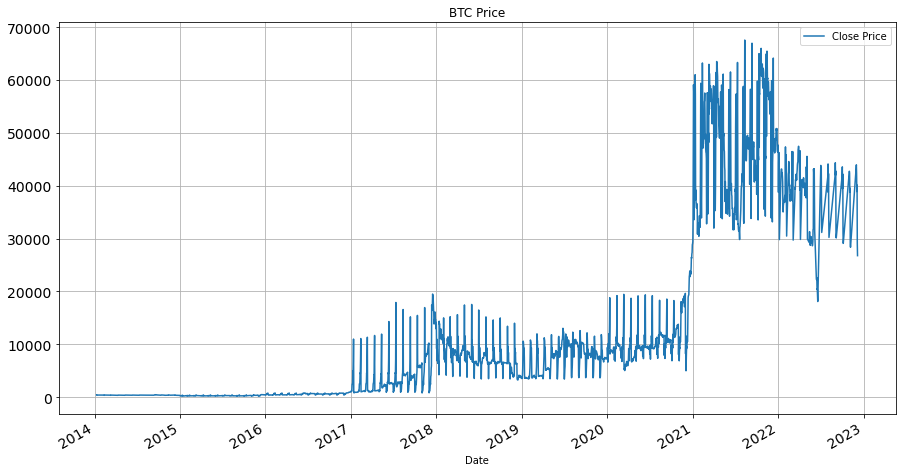

In [61]:
# plotting a line graph with closing price against the date as well as the volume graph below it
btc.Close.plot(figsize=(15,8), title="BTC Price", fontsize=14, label="Close Price")
plt.legend()
plt.grid()
plt.show()

<h3> 4.2 Resampling the Data based on months </h3>
<p> As the daily date is too big to do analysis and prediction. I will be predicting the Bitcoin price in terms of month. In this I will be resampling the Data into months.

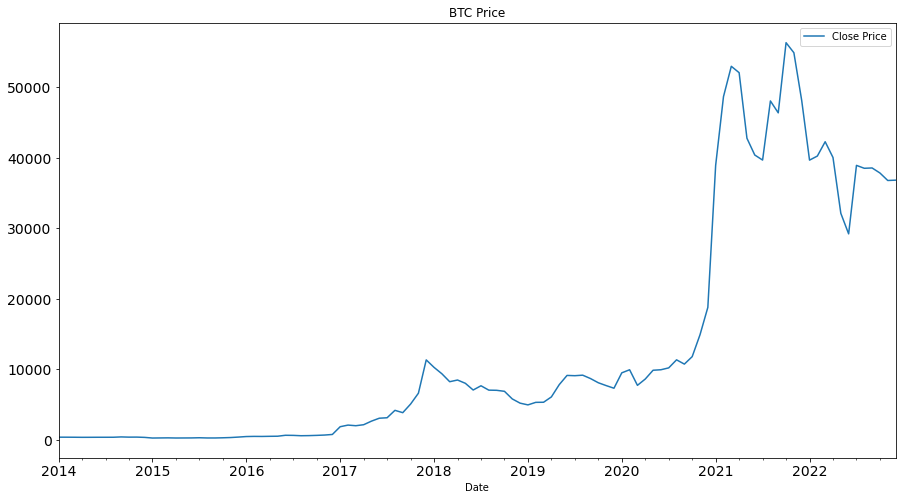

In [62]:
# Resampling data and getting the mean of the monthly data
btc_month = btc.resample('M').mean()
# checking total number of entries: 108
btc_month.count()

# plotting the graph for better visualisation
btc_month.Close.plot(figsize=(15,8), title="BTC Price", fontsize=14, label="Close Price")
plt.legend()
plt.show()

<h2> 5. Predicting Prices with Time Series Forecasting </h2>
<h3> 5.1 Time Series Forecasting </h3>
<p> Time series forecasting is the process of analysing time series data using statistics and modeling to make predictions. It is a technique that is commonly used to predict future trends by analysing past trends and to predict future trend that might hold similar to the past trends. In this project, I will be exploring on the ARIMA model to predict the prices. <p>

<h3> 5.2 Stationary Check </h3>
<p> I will be checking whether the time series is stationary so as to ensure the statistical properties like mean or variance over time do not vary with time. To do so, I will be using the Dickey-Fuller Test to help me to check whether the time series is in stationary. For the time series to be stationary, the p-value has to be below 0.05.

Dickey–Fuller test: p=0.853875


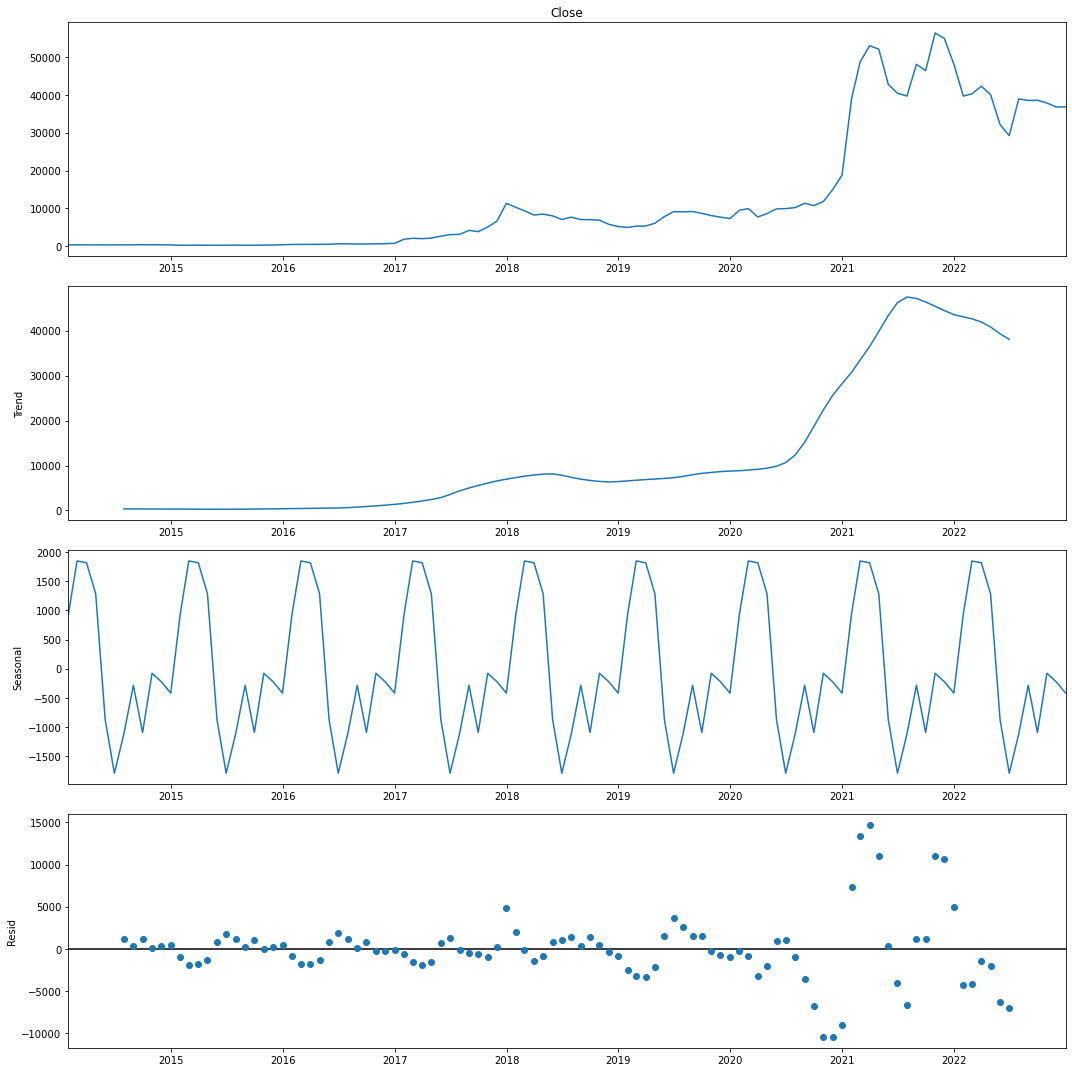

In [63]:
# seasonal decomposition for monthly close price
seasonal_decompose(btc_month.Close).plot()

#printing the p-value of the closing price 
print("Dickey–Fuller test: p=%f" % adfuller(btc_month.Close)[1])

# plotting the STL decomposition graph
plt.rcParams["figure.figsize"] = (15,15)
plt.show()

<p> With the p-value at 0.853875, this indicates that the series is not stationary with 85.3% confidence. </p>

<h3> 5.3 Box-Cox Transformation </h3>
<p> As the ARIMA model requires the time series to be in stationary so as to predict effectively the data, I will be using Box-Cox transformation to assist me by tranforming the data to be 'normal'. I will be doing so by supressing some of the variance.

In [64]:
# Box-Cox transformation
btc_month['close_box'], lmbda = stats.boxcox(btc_month.Close)
print("Dickey–Fuller test: p=%f" % adfuller(btc_month.close_box)[1])


Dickey–Fuller test: p=0.853198


<p> The p-value is still not in stationary. </p>

<h3> 5.4 Applying Differencing </h3>
    <p> In order to use ARIMA model to conduct time series forecasting, another step is differencing the data until the time series becomes stationary. As the ARIMA model accounts for oscillations and not for trend, I have to adjust my time series data to be stationary. Therefore, I will be accounting for trends by differencing out the data before parsing to the ARIMA model for data prediction and processing. </p>

<h3> Seasonal Differentiation </h3>
<p> One of the method to differentiate the data is by doing seasonal differencing, where the seasonal here refers to a period of time, not the seasons in a year. I will be using a year as the seasonal period in this project.

In [65]:
# Seasonal differentiation (12 months)

# Subtracting the current month by the previous year's month
btc_month['box_diff_seasonal_12'] = btc_month.close_box - btc_month.close_box.shift(12)
print("Dickey–Fuller test: p = %f" % adfuller(btc_month.box_diff_seasonal_12[12:])[1])

Dickey–Fuller test: p = 0.259570


<p> The p-value is still not in stationary. </p>

<h3> STL decomposition </h3>
<p> Sometimes, it is necessary to difference the data a second time to obtain the stationary time series, it is what we called as a second order differencing. <br> <br>
    I have selected to do STL decomposition is because the Bitcoin closing prices are very volatile and this really works out for STL decomposition method. This is because not only is the seasonal component allowed to change over time, the rate of control can also be controlled by the user. The main reason is due to the method being robust towards outliers, which is common in the Bitcoin market. </p>

In [66]:
# Second order differentiation
btc_month['box_diff2'] = btc_month.box_diff_seasonal_12 - btc_month.box_diff_seasonal_12.shift(1)
print("Dickey–Fuller test: p=%f" % adfuller(btc_month.box_diff2[13:])[1])

Dickey–Fuller test: p=0.000897


<p> Right now, the p-value has indicated that the time series is stationary as the p-value is lower than the signifance level alpha = 0.05. </p>


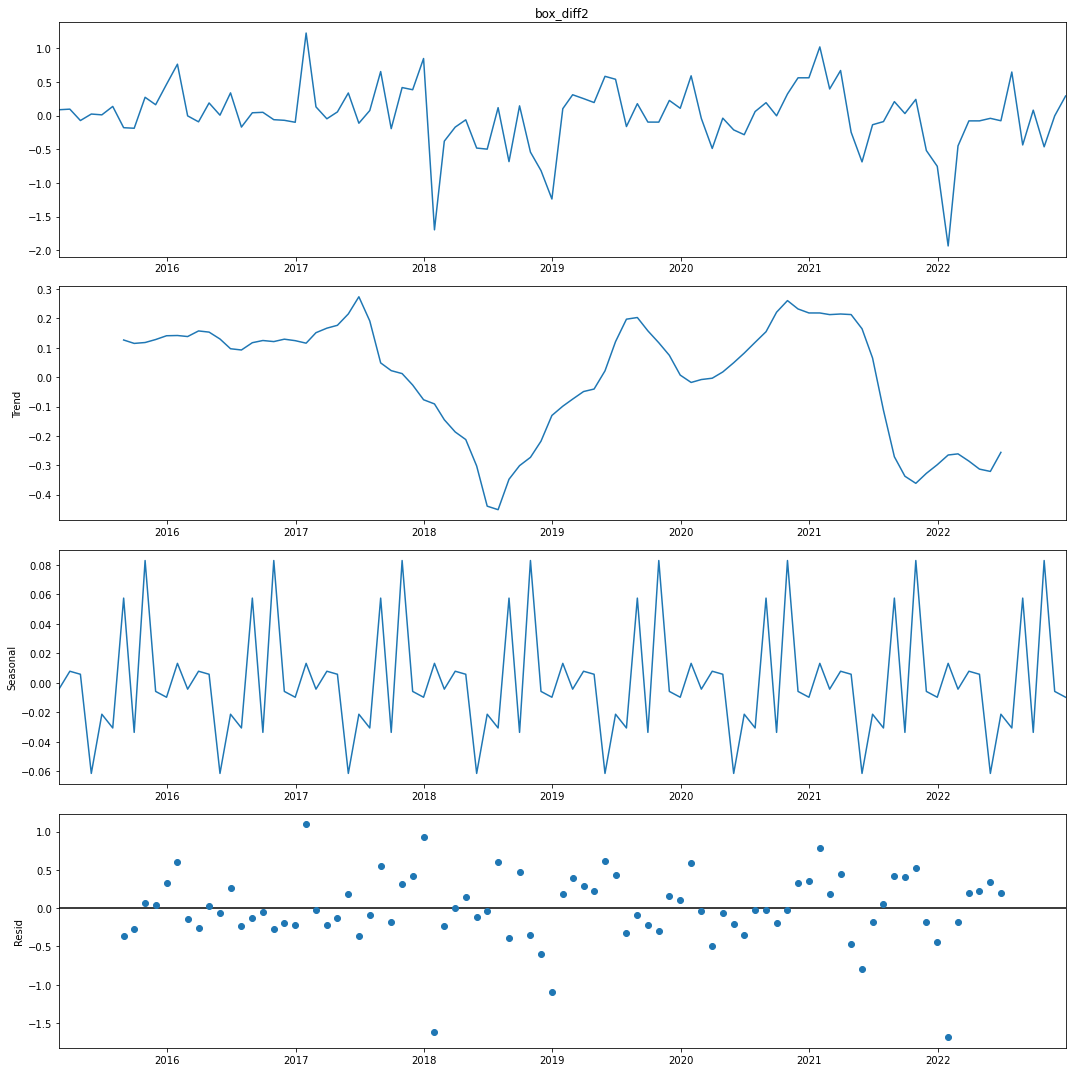

In [67]:
# STL-decomposition
seasonal_decompose(btc_month.box_diff2[13:]).plot()   
plt.show()


<h3> 5.5 Autocorrelation </h3>
<p> Autocorrelation refers to the degree of correlation of the same variables between two successive time intervals. It measures how the lagged version of the value of a variable is related to the original version of it in a time series. </p> 
<p> I will be looking at the autocorrelation factor (ACF) and partial autocorrelation factor (PACF) plots to identify the patterns so as to identify the values of AR and MA components in the residuals for my ARIMA model in the later part. </p>

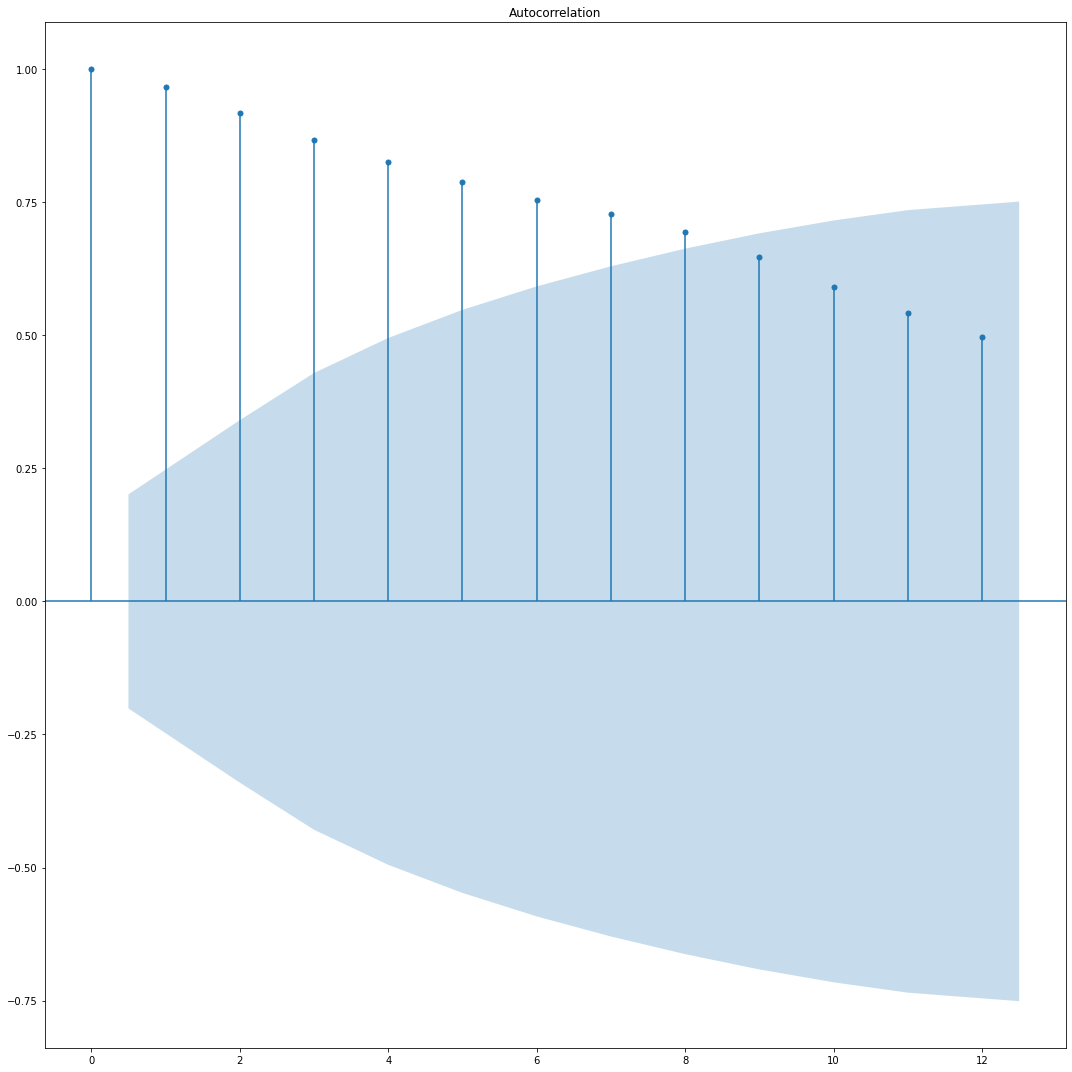

In [68]:
# autocorrelation_plot(btc_month.Close) 
plot_acf(btc_month.Close[13:].values.squeeze(), lags=12)

plt.tight_layout()
plt.show()

<p> It has a strong correlation with the first 12 lags that is significant for the first 8 lags. Therefore a good point for the AR parameter of the ARIMA model will be 8. </p>
<p> I will now be plotting the partial correlation plot which is the autocorrelation on the differences. </p>


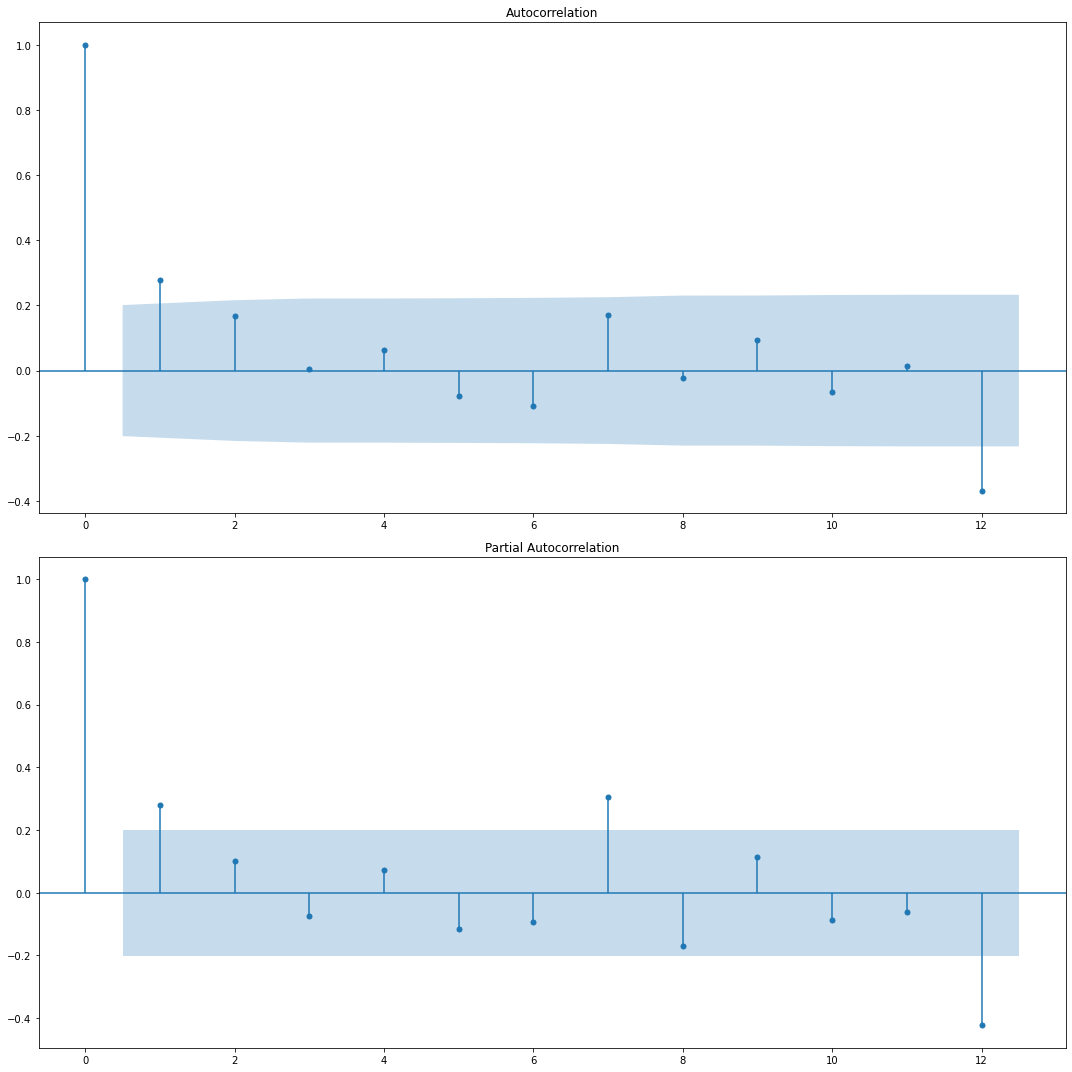

In [69]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
ax = plt.subplot(211)

# Plot the autocorrelation function
plot_acf(btc_month.box_diff2[13:].values.squeeze(), lags=12, ax=ax)
ax = plt.subplot(212)

# Plot the partial autocorrelation function
plot_pacf(btc_month.box_diff2[13:].values.squeeze(), lags=12, ax=ax)

plt.tight_layout()
plt.show()

<h3> 5.6 ARIMA Model </h3>
<p> ARIMA model stands for AutoRegressive Integrated Moving Average. The model is denoted with the notation ARIMA(p, d, q). </p>
<ul>
    <li> p - the number of lag observations to include in the model, or lag order. (AR) </li>
    <li> d - the number of times that the raw observations are differenced, or the degree of differencing. (I) </li>
    <li> q - the size of the moving average window, also called the order of moving average.(MA) </li>
</ul>

<p> <strong>Parameter Selection </strong> </p>
<p> I will be iteratively playing around with the parameters to look for the best ARIMA combination model. In order to check for the best model, I will be checking it against SARIMAX() to assess the quality. I will also be using AIC (Akakike Information Criterion) which measures how well the ARIMA model will fit my time series data. All in all, I am interested in the model that has the lowest AIC value. 

In [70]:
# Initialisation of parameters in ARIMA model
qs = range(0, 3)
ps = range(0, 3)
d=1
parameters = product(ps, qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model = SARIMAX(btc_month.close_box, order=(param[0], d, param[1])).fit(disp=-1)
    except ValueError:
        print('bad parameter combination:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

  parameters        aic
3     (1, 0)  55.638617
1     (0, 1)  57.160691
4     (1, 1)  57.546217
6     (2, 0)  57.546220
2     (0, 2)  57.609892


<p> According to the printed results, the parameter combination (1, 0) has the lowest AIC value, which makes it the best model to fit for the ARIMA prediction. </p>

<h3> Generate best model summary </h3>
<p> Lets take a closer look on the SARIMAX model summary </p>

In [71]:
# printing the best models parameters summary
print(best_model.summary())

                               SARIMAX Results                                
Dep. Variable:              close_box   No. Observations:                  108
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 -25.819
Date:                Tue, 21 Jun 2022   AIC                             55.639
Time:                        19:56:14   BIC                             60.984
Sample:                    01-31-2014   HQIC                            57.806
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3132      0.096      3.261      0.001       0.125       0.501
sigma2         0.0948      0.007     12.901      0.000       0.080       0.109
Ljung-Box (L1) (Q):                   0.16   Jarque-

<h3> Summary Results </h3>
<p> The coef column shows the weight or importance of each covariance type and how each impacts the time series data. The P>|z| column shows the significance of each feature weight. In the results, the p-value is lower than 0.05 indicating that it is okay to leave all of them in our model. </p>

<h3> Model Diagnostics </h3>
<p> Before I move to predict prices with the ARIMA model, I will run a model diagnostics to ensure that my model is in stationary and do not produce any trend patterns which can affect the ARIMA model. </p>

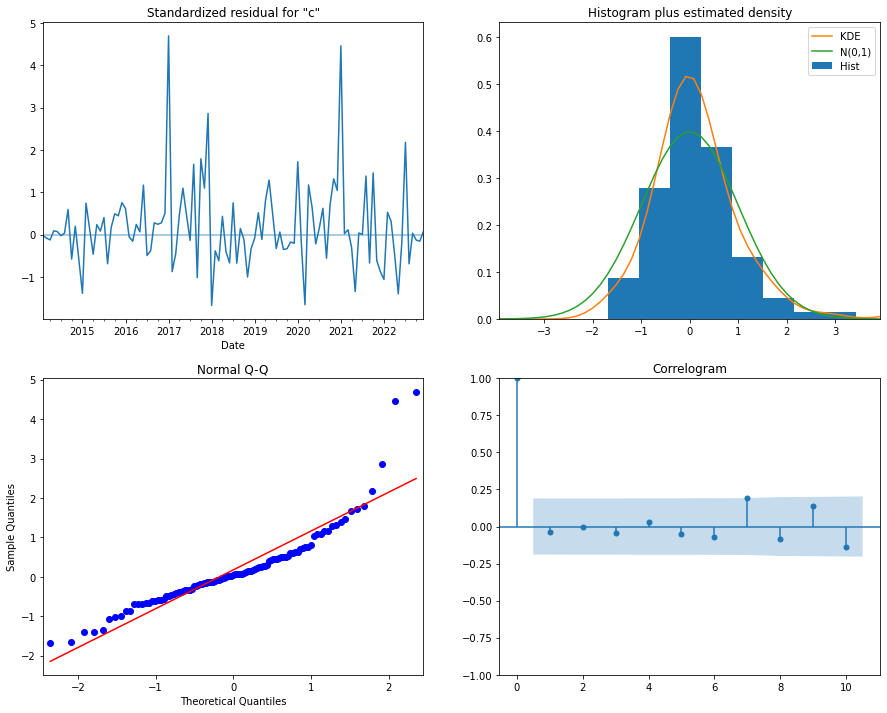

In [72]:
# Plot diagnostic model using the best model combination 
best_model.plot_diagnostics(figsize=(15, 12))
plt.show()

<p> Firstly is the histogram plot, the KDE line (orange) should follow the N(0, 1) line (green line which refers to normal distribution with mean 0, standard deviation 1) closely. This is to show whether the residuals has been normally distributed. </p>
<p> Next one is the Q-Q plot, the ordered distribution of residuals (blue dots) should follow the linear trend samples taken from a standard normal distribution with the N(0, 1) line. This is also to indicate that the residuals has been normally distributed. </p>
<p> Lastly is the standardised residual plot which does not display any obvious seasonality, this can be confirm with the autocorrelation graph, which shows the time series has low correlation. </p>

<h3> Prediction Function </h3>
<p> In this prediction, I will be predicting the close price of Bitcoin till the end of June 2022. I will be using the best model time series that I have computed and apply the Inverse Box-Cox Transformation function to revert back the forecast closing price and then plotting it against the actual close price to compare against it. <p>

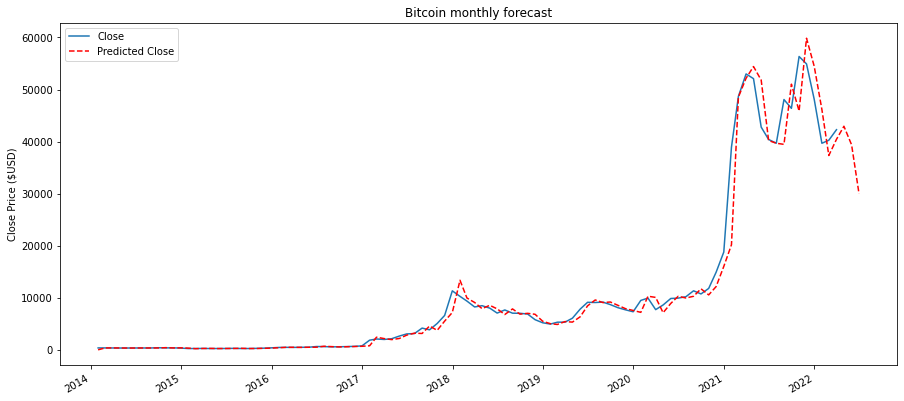

In [94]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

# Removing the predicted time series data after June 2022
if btc_month.shape[0] != 101:
    btc_month.drop(btc_month.tail(7).index, inplace=True)


# Prediction
btc_month_pred = btc_month[['Close']]
date_list = [datetime(2022, 3, 31), datetime(2022, 4, 30), datetime(2022, 5, 31), datetime(2022, 6, 30)]
future = pd.DataFrame(index=date_list, columns= btc_month.columns)
btc_month_pred = pd.concat([btc_month_pred, future])

# Applying inverse box-cox transformation function
btc_month_pred['forecast'] = invboxcox(best_model.predict(start=datetime(2014, 1, 31), end=datetime(2022, 6, 30)), lmbda)

# Plotting the graph
plt.figure(figsize=(15,7))
btc_month_pred.Close.plot()
btc_month_pred.forecast.plot(color='r', ls='--', label='Predicted Close')
plt.legend()
plt.title('Bitcoin monthly forecast')
plt.ylabel('Close Price ($USD)')
plt.show()

<h2> 6. Conclusion </h2>
<h3> Summary </h3>
<p> The results have indicated that the model is still a little rough and not something that I should use as a trading advice, but this is not unexpected due to the extremely volatile nature of Bitcoin especially in the recent months. </p>
<p> It is probably not a good idea to try and predict the closing price in a monthly basis. These are the number of things that I think would help to improve the prediction and the model: </p>
<ul> 
    <li> Use a different technique to standardised the distribution and also the differentiation techniques. </li>
    <li> Discard the time period before cryptocurrencies started taking off (when Bitcoin was still in it's founding stage) </li>
    <li> Try modelling in a daily basis instead of monthly, with a smaller prediction window (e.g. weekly) for better analysis </li>
    <li> Explore on other models or methods instead of the ARIMA </li>


<h2> 7. Reference List </h2>
<h3> Introduction </h3>
<ul>
    <li> Matthew Sparkes, <i>What is bitcoin and how does it work?</i>, NewScientist, Accessed 19 June 2022. <a href="https://www.newscientist.com/definition/bitcoin/#:~:text=Bitcoin%20was%20created%20as%20a,used%20just%20like%20traditional%20currencies">https://www.newscientist.com/definition/bitcoin/#:~:text=Bitcoin%20was%20created%20as%20a,used%20just%20like%20traditional%20currencies </a> </li> 
    <li> Katherine (Yi) Li (13 May 2022), <i>Predicting Stock Prices using Machine Learning</i>, Neptune.ai, Accessed 19 June 2022.<br> <a href="https://neptune.ai/blog/predicting-stock-prices-using-machine-learning">https://neptune.ai/blog/predicting-stock-prices-using-machine-learning </a> </li>

</ul>

<h3> Data </h3>
<ul>
    <li> CoinMarketCap (19 June 2022), <i>BTC-USD.csv</i>, Yahoo Finance, Accessed 19 June 2022. <br> <a href="https://finance.yahoo.com/quote/BTC-USD/history?period1=1410912000&period2=1655596800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true"> https://finance.yahoo.com/quote/BTC-USD/history?period1=1410912000&period2=1655596800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true </a> </li>
    <li> Kesavan Balasubramaniam (1 January 2020), <i>How to calculate a stock's adjusted closing price</i>, Investopedia, Accessed 19 June 2022. <br> <a href="https://www.investopedia.com/ask/answers/06/adjustedclosingprice.asp"> https://www.investopedia.com/ask/answers/06/adjustedclosingprice.asp </a> </li>
    <li> pandas (2 April 2022), <i>pandas.DataFrame</i> , Accessed 19 June 2022. <br> <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html"> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html </a> </li>
    
</ul>

<h3> Data Formatting and Graphs </h3>
<ul>
    <li> PyPI (26 May 2022), <i>mplFinance</i>, Acessed 20 June 2022. <br> <a href="https://pypi.org/project/mplfinance/"> https://pypi.org/project/mplfinance/ </a> </li>
    <li> GeeksforGeeks (22 October 2019), <i>Pandas dataframe.resample()</i>, Accessed 20 June 2022. <br> <a href="https://www.geeksforgeeks.org/python-pandas-dataframe-resample/"> https://www.geeksforgeeks.org/python-pandas-dataframe-resample/ </a> </li>
    <li> pandas (2 April 2022), <i>pandas.DataFrame</i> , Accessed 20 June 2022. <br> <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html"> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html </a> </li>

</ul>

<h3> Predicting Prices with Time Series Forecasting </h3>
<ul>
    <li> Anais Dotis-Georgiou (22 July 2021), <i>An introduction to time series forecasting</i>, InfoWorld, Accessed 20 June 2022 <br> <a href="https://www.infoworld.com/article/3622246/an-introduction-to-time-series-forecasting.html"> https://www.infoworld.com/article/3622246/an-introduction-to-time-series-forecasting.html </a> </li>
    <li> GeeksforGeeks (6 Aug 2021), <i>Autocorrelation plot using Matplotlib</i>, Accessed 20 June 2022 <br> <a href="https://www.geeksforgeeks.org/autocorrelation-plot-using-matplotlib/?ref=rp"> https://www.geeksforgeeks.org/autocorrelation-plot-using-matplotlib/?ref=rp</a> </li>
    <li> Statistics.com, <i>Seasonal Decomposition</i>, The Institute for Statistics Education, Accessed 20 June 2022. <br> <a href="https://www.statistics.com/glossary/seasonal-decomposition/"> https://www.statistics.com/glossary/seasonal-decomposition/ </a> </li>
    <li> Vijay Kumar G (16 June 2021), <i> Statistical Test to check stationary in time series </i>, Analytics Vidhya, Accessed 20 June 2022. <br> <a href="https://www.analyticsvidhya.com/blog/2021/06/statistical-tests-to-check-stationarity-in-time-series-part-1/#:~:text=A%20Stationary%20series%20is%20one,a%20Trend%20or%20Seasonal%20components."> https://www.analyticsvidhya.com/blog/2021/06/statistical-tests-to-check-stationarity-in-time-series-part-1/#:~:text=A%20Stationary%20series%20is%20one,a%20Trend%20or%20Seasonal%20components. </a> </li>
    <li> Wikipedia (30 March 2022), <i> Dickey-Fuller Test </i>, Accessed on 20 June 2022 <br> <a href="https://en.wikipedia.org/wiki/Dickey%E2%80%93Fuller_test"> https://en.wikipedia.org/wiki/Dickey%E2%80%93Fuller_test </a> </li>
    <li> Rob J Hyndman and George Athanasopoulos (April 2018), <i>Forecasting: Principles and Practice</i>, Accessed 20 June 2022 <br> <a href="https://otexts.com/fpp2/"> https://otexts.com/fpp2/ </a> </li>
    <li> Josef Perktold, Skipper Seabold, Jonathan Taylor, statsmodels-developers (8 February 2022), <i>statsmodels v0.13.2</i> Acessed 21 June 2022. <br> <a href="https://www.statsmodels.org/stable/user-guide.html#time-series-analysis"> https://www.statsmodels.org/stable/user-guide.html#time-series-analysis </a> </li>
    <li> Jason Brownlee (23 June 2020), <i>How to remove trends and seasonality with a difference transform in python</i> Accessed 21 June 2022. <a href="https://machinelearningmastery.com/remove-trends-seasonality-difference-transform-python/"> https://machinelearningmastery.com/remove-trends-seasonality-difference-transform-python/ </a> </li>
    <li> Zack West, <i>Autocorrelation of time series data in python</i>, Alpharithms, Accessed 21 June 2022. <br> <a href ="https://www.alpharithms.com/autocorrelation-time-series-python-432909/#:~:text=Autocorrelation%20(ACF)%20is%20a%20calculated,values%20in%20time%20series%20data."> https://www.alpharithms.com/autocorrelation-time-series-python-432909/#:~:text=Autocorrelation%20(ACF)%20is%20a%20calculated,values%20in%20time%20series%20data. </a> </li>
    <li> Charanraj Shetty (22 September 2020), <i>Time Series Model</i>, Accessed 21 June 2022. <br> <a href="https://towardsdatascience.com/time-series-models-d9266f8ac7b0"> https://towardsdatascience.com/time-series-models-d9266f8ac7b0 </a> </li>
    <li> Good Goat (20 June 2020), <i>Inverse box-cox transfromation python</i>, Accessed 21 June 2022. <br> <a href="https://www.codegrepper.com/code-examples/python/inverse+box-cox+transformation+python"> https://www.codegrepper.com/code-examples/python/inverse+box-cox+transformation+python </a> </li>
    <li> pandas (2 April 2022), <i>pandas.DataFrame</i> , Accessed 21 June 2022. <br> <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html"> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html </a> </li>
    

</ul>

<h3> Others </h3>
<ul>
    <li> mattcone (15 June 2022), <i>The Markdown Guide</i>, Amazon Services LLC, Accessed 19 June 2022. <br> <a href="https://www.markdownguide.org/basic-syntax/">https://www.markdownguide.org/basic-syntax/ </a> </li> 

</ul>